# Advanced Regression
## Contents
### Linear regression
### Multivariable linear regression 
### Polynomial Regression
### Logistic regression
### Random forest  
### Support vector  
### k-Nearest Neighbors   
### Gradient boosting  
### Multi-layer Perception  

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

import yfinance as yf

yf.pdr_override()

# Linear regression

In [2]:
# Simulate x and y variables
X = np.linspace(0, 10, 21).reshape(-1, 1)
mean, std = 0, 1
coef_, int_ = 2, 5
y = coef_ * X.flatten() + int_ + np.random.normal(mean, std, len(X))

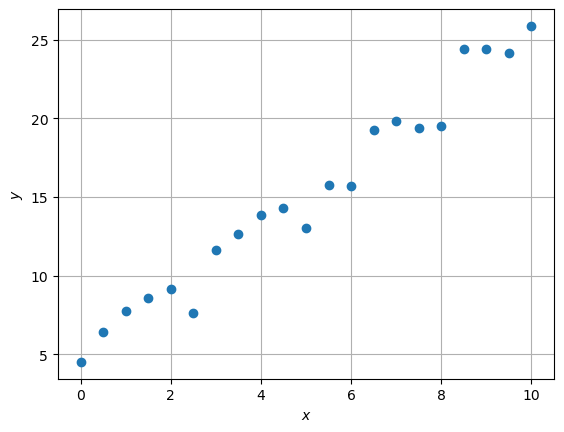

In [3]:
# Visualization
plt.plot(X, y, "o")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.show()

In [4]:
# fit the data
reg = LinearRegression().fit(X, y)
print("R2:", round(reg.score(X, y), 3))
print("Fitted coef:", round(float(reg.coef_), 1))
print("Fitted intercept:", round(float(reg.intercept_), 1))

R2: 0.969
Fitted coef: 2.1
Fitted intercept: 4.8


In [5]:
# generate predictions
y_pred = reg.predict(X)

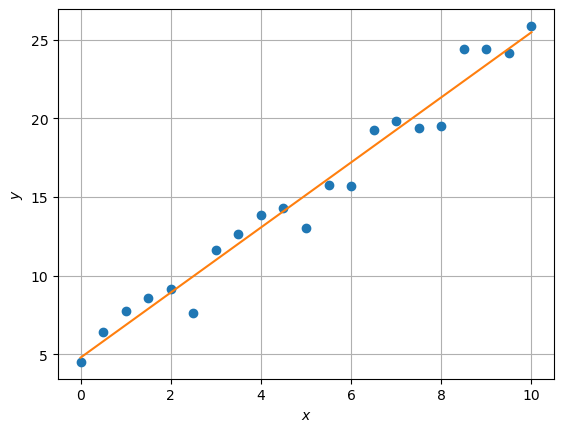

In [6]:
# Visualize solution
plt.plot(X, y, "o")
plt.plot(X, y_pred)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.show()

# Multivariate Linear Regression

In [7]:
# Simulate X and y variables
X = np.linspace((0, 3), (10, 8), 21) + np.random.normal(0, 1, (21, 2))
coef_, int_ = np.array([2, -1]), 3
mean, std = 0, 2
y = np.dot(X, coef_) + int_ + np.random.normal(mean, std, len(X))

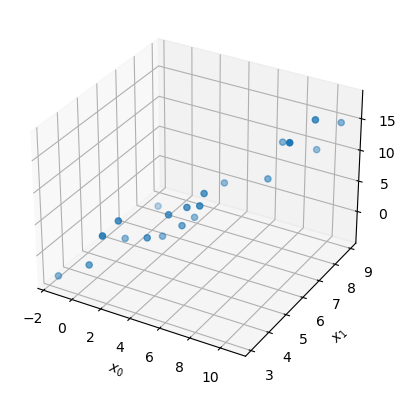

In [8]:
# Visualization
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(X[:, 0], X[:, 1], y)
ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$")
ax.set_zlabel("$y$")
plt.show()

In [9]:
# fit the data
reg = LinearRegression().fit(X, y)
print("R2:", round(reg.score(X, y), 4))
print("Fitted coef:", reg.coef_)
print("Fitted intercept:", reg.intercept_)
print(
    "Note that coef and intercept may vary due to correlation between X[:, 0] and X[:, 1]"
)

R2: 0.8848
Fitted coef: [ 1.95987791 -1.00954811]
Fitted intercept: 2.532073387189376
Note that coef and intercept may vary due to correlation between X[:, 0] and X[:, 1]


In [10]:
# generate predictions
y_pred = reg.predict(X)

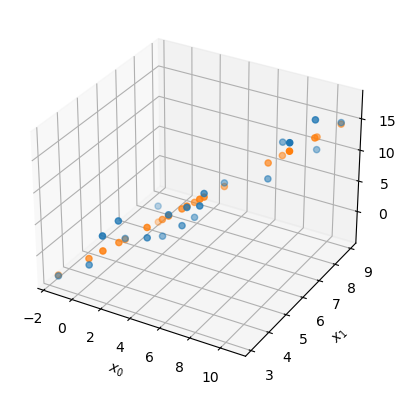

In [11]:
# Visualize solution
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(X[:, 0], X[:, 1], y)
ax.scatter(X[:, 0], X[:, 1], y_pred)
ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$")
ax.set_zlabel("$y$")
plt.show()

# Polynomial Regression

In [12]:
X = np.linspace(0, 10, 21)
mean, std = 0, 3
y = (
    1
    + 2 * X
    + 0.5 * (X + 1) ** 2
    + 2 * (X - 5) ** 3
    + 10 * np.random.normal(mean, std, len(X))
)

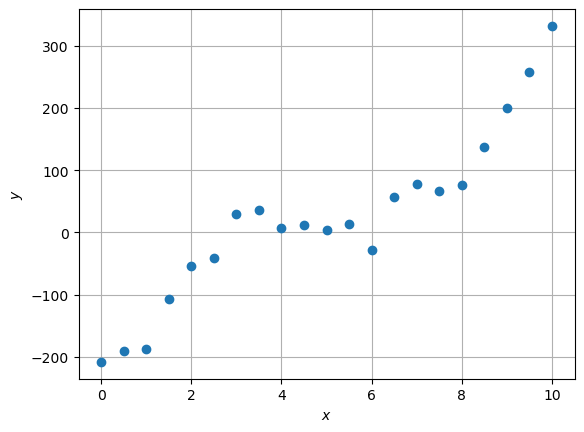

In [13]:
# Visualization
plt.plot(X, y, "o")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.show()

In [14]:
z = np.polyfit(X, y, 3)
z

array([   2.02400788,  -29.2663271 ,  148.49807745, -250.55444157])

In [15]:
y_pred = np.poly1d(z)(X)

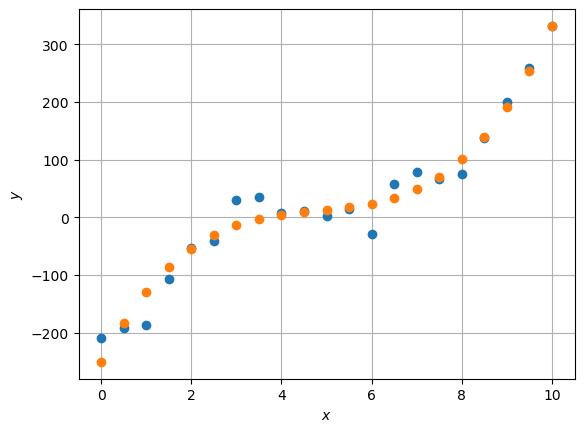

In [16]:
# Visualize solution
plt.plot(X, y, "o")
plt.plot(X, y_pred, "o")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.show()

# Logistic Regression

In [17]:
df = pdr.get_data_yahoo("^GSPC", "2020-01-01", "2024-01-01")
df = df.dropna()
df = df.iloc[:, :4]
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close
Date,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049


In [18]:
df.tail()

,Open,High,Low,Close
Date,,,,
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078
2023-12-28,4786.439941,4793.299805,4780.979980,4783.350098
2023-12-29,4782.879883,4788.430176,4751.990234,4769.830078


In [19]:
# 10-day moving average, correlation, daily differences as variables
df["S_10"] = df["Close"].rolling(window=10).mean()
df["Corr"] = df["Close"].rolling(window=10).corr(df["S_10"])
df["Open-Close"] = df["Open"] - df["Close"].shift(1)
df["Open-Open"] = df["Open"] - df["Open"].shift(1)
df = df.dropna()
X = df.iloc[:, -3:]
X

,Corr,Open-Close,Open-Open
Date,,,
2020-01-29,-0.343819,13.219971,34.109863
2020-01-30,-0.560707,-16.949951,-33.010010
2020-01-31,-0.300682,-1.329834,25.880127
2020-02-03,0.195445,10.139893,-46.670166
2020-02-04,0.221437,31.690186,44.950195
...,...,...,...
2023-12-22,0.772478,7.169922,29.629883
2023-12-26,0.756900,4.229980,4.939941
2023-12-27,0.741324,-1.299805,14.590332


In [20]:
# +1 for price increase, -1 otherwise
y = np.where(df["Close"].shift(-1) > df["Close"], 1, -1)

In [21]:
split = int(0.7 * len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [22]:
model = LogisticRegression()
model = model.fit(X_train, y_train)

In [23]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Corr,[0.028651239492987344]
1,Open-Close,[-0.0069290523792118605]
2,Open-Open,[0.0002695489196279617]


In [24]:
probability = model.predict_proba(X_test)
print(probability)

[[0.46785432 0.53214568]
 [0.40747051 0.59252949]
 [0.47209349 0.52790651]
 [0.46774029 0.53225971]
 [0.42645549 0.57354451]
 [0.51468971 0.48531029]
 [0.46401984 0.53598016]
 [0.43271134 0.56728866]
 [0.55159787 0.44840213]
 [0.49042633 0.50957367]
 [0.48834905 0.51165095]
 [0.4443717  0.5556283 ]
 [0.65685425 0.34314575]
 [0.47385816 0.52614184]
 [0.43875157 0.56124843]
 [0.54754407 0.45245593]
 [0.44163489 0.55836511]
 [0.40256156 0.59743844]
 [0.49743859 0.50256141]
 [0.45199856 0.54800144]
 [0.49343873 0.50656127]
 [0.45942078 0.54057922]
 [0.45837792 0.54162208]
 [0.43223672 0.56776328]
 [0.47103994 0.52896006]
 [0.46571481 0.53428519]
 [0.46883907 0.53116093]
 [0.40649361 0.59350639]
 [0.4318914  0.5681086 ]
 [0.46969084 0.53030916]
 [0.46147099 0.53852901]
 [0.49377141 0.50622859]
 [0.45343154 0.54656846]
 [0.4799981  0.5200019 ]
 [0.59827404 0.40172596]
 [0.46649395 0.53350605]
 [0.40777637 0.59222363]
 [0.4615366  0.5384634 ]
 [0.46953198 0.53046802]
 [0.4545428  0.5454572 ]


In [25]:
predicted = model.predict(X_test)

In [26]:
print(metrics.confusion_matrix(y_test, predicted))

[[ 14 128]
 [ 20 135]]


In [27]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.41      0.10      0.16       142
           1       0.51      0.87      0.65       155

    accuracy                           0.50       297
   macro avg       0.46      0.48      0.40       297
weighted avg       0.46      0.50      0.41       297



In [28]:
print(model.score(X_test, y_test))

0.5016835016835017


In [29]:
cross_val = cross_val_score(LogisticRegression(), X, y, scoring="accuracy", cv=10)
print(cross_val)
print(cross_val.mean())

[0.50505051 0.56565657 0.51515152 0.52525253 0.49494949 0.56565657
 0.51515152 0.52525253 0.53061224 0.47959184]
0.5222325293753867


# Random Forest Regression

In [30]:
data = pd.read_csv("boston.csv")  # boston housing market data
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [31]:
# clear empty rows
def clean_dataset(dataset):
    # replace 0 with pandas null and eliminate all null values
    dataset[dataset.columns.difference(["CHAS"])] = (
        dataset[dataset.columns.difference(["CHAS"])].replace(0.0, pd.NA).dropna()
    )
    dataset.dropna(axis=0, how="any", inplace=True)
    return dataset

In [32]:
data = clean_dataset(data)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,0.07950,60.0,1.69,0.0,0.411,6.579,35.9,10.7103,4.0,411.0,18.3,370.78,5.49,24.1
352,0.07244,60.0,1.69,0.0,0.411,5.884,18.5,10.7103,4.0,411.0,18.3,392.33,7.79,18.6
353,0.01709,90.0,2.02,0.0,0.410,6.728,36.1,12.1265,5.0,187.0,17.0,384.46,4.50,30.1
354,0.04301,80.0,1.91,0.0,0.413,5.663,21.9,10.5857,4.0,334.0,22.0,382.80,8.05,18.2


In [33]:
data.corr()["MDEV"]  # this is the variable to predict (median home values)

CRIM       0.219338
ZN         0.208413
INDUS     -0.346514
CHAS       0.211686
NOX        0.222371
RM         0.925841
AGE       -0.033786
DIS       -0.393041
RAD       -0.083381
TAX       -0.308583
PTRATIO   -0.489165
B          0.067230
LSTAT     -0.581478
MDEV       1.000000
Name: MDEV, dtype: float64

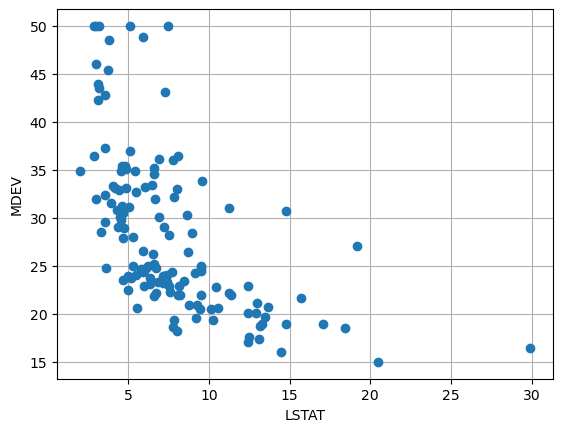

In [34]:
# LSTAT and RM have highest abselute correlation coefficients
# so they will be the selected input variables
plt.plot(data["LSTAT"], data["MDEV"], "o")
plt.grid()
plt.xlabel("LSTAT")
plt.ylabel("MDEV")
plt.show()

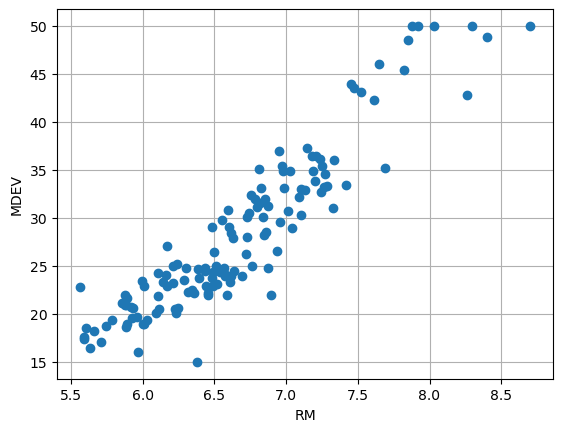

In [35]:
plt.plot(data["RM"], data["MDEV"], "o")
plt.grid()
plt.xlabel("RM")
plt.ylabel("MDEV")
plt.show()

In [36]:
X = data[["RM", "LSTAT"]]
X = (X - X.mean()) / X.std()
y = data["MDEV"]
y = (y - y.mean()) / y.std()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=25
)

In [38]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [39]:
y_pred = regr.predict(X_test)

In [40]:
r2 = metrics.r2_score(y_test, y_pred)
print("R2:", round(r2, 3))

R2: 0.917


# Support Vector Regression

In [41]:
model = SVR()

In [42]:
model.fit(X_train, y_train)

SVR()

In [43]:
y_pred = model.predict(X_test)

In [44]:
r2 = metrics.r2_score(y_test, y_pred)
print("R2:", round(r2, 3))

R2: 0.928


# kNN Regression

In [45]:
knn = KNeighborsRegressor(n_neighbors=3)

In [46]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [47]:
y_pred = knn.predict(X_test)

In [48]:
r2 = metrics.r2_score(y_test, y_pred)
print("R2:", round(r2, 3))

R2: 0.951


# Gradient Boosting

In [49]:
gbr = GradientBoostingRegressor(n_estimators=200, max_depth=3)

In [50]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=200)

In [51]:
y_pred = gbr.predict(X_test)

In [52]:
r2 = metrics.r2_score(y_test, y_pred)
print("R2:", round(r2, 3))

R2: 0.921


# Multi-layer Perception 

In [53]:
mlp = MLPRegressor(activation="logistic", solver="lbfgs", alpha=0.0001, random_state=25)

In [54]:
mlp.fit(X_train, y_train)

/Users/andrewbonham/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(activation='logistic', random_state=25, solver='lbfgs')

In [55]:
y_pred = mlp.predict(X_test)

In [56]:
r2 = metrics.r2_score(y_test, y_pred)
print("R2:", round(r2, 3))

R2: 0.936
